## Week 2 HW 최정윤

### 1. FCB Exercises 3.3 : Tumor counts

**3.3**
Tumor counts: A cancer laboratory is estimating the rate of tumorigenesis in two strains of mice, A and B. They have tumor count data for 10 mice in strain A and 13 mice in strain B. Type A mice have been well studied, and information from other laboratories suggests that type A mice have tumor counts that are approximately Poisson-distributed with a mean of 12. Tumor count rates for type B mice are unknown, but type B mice are related to type A mice. The observed tumor counts for the two populations are

$yA = (12,9,12,14,13,13,15,8,15,6)$


$yB = (11,11,10,9,9,8,7,10,6,8,8,9,7).$

In [1]:
import scipy
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import nbinom
from scipy.stats import gamma

# Likelihood
def likelihood(theta, n, sy):
    return (theta**sy)*np.exp(-n*theta)

In [2]:
y_A = [12, 9, 12, 14, 13, 13, 15, 8, 15, 6]
y_B = [11, 11, 10, 9, 9, 8, 7, 10, 6, 8, 8, 9, 7]

------
**a)** Find the posterior distributions, means, variances and 95% quantile- based confidence intervals for $θ_A$ and $θ_B$ , assuming a Poisson sampling distribution for each group and the following prior distribution:


$θ_A ∼ gamma(120,10), θ_B ∼ gamma(12,1), p(θ_A,θ_B) = p(θ_A)×p(θ_B).$

In [3]:
nA, syA = len(y_A), sum(y_A)
nB, syB = len(y_B), sum(y_B)

posterior distributions, means, variances and 95% quantile- based confidence intervals for $θ_A$

In [4]:
# prior parameters for theta ~ gamma(a,b) 
a = 120
b = 10

# posterior distribution
post_distribution = gamma(a+syA, scale=1/(b+nA))

# posterior mean
post_mean = (a+syA)/(b+nA)

# posterior variance
post_var = (a+syA)/(b+nA)**2

# posterior 95% CI
lbA=gamma.ppf(0.025, a+syA, scale=1/(b+nA))
ubA=gamma.ppf(0.975, a+syA, scale=1/(b+nA))

print("posterior distributions:", post_distribution)
print("posterior means:", post_mean)
print("posterior variances:", post_var)
print("posterior 95% CI:", (lbA, ubA))

posterior distributions: <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9d86c18d00>
posterior means: 11.85
posterior variances: 0.5925
posterior 95% CI: (10.389238190941795, 13.405448325642006)


posterior distributions, means, variances and 95% quantile- based confidence intervals for $θ_B$

In [5]:
# prior parameters for theta ~ gamma(a,b) 
a = 12
b = 1

# posterior distribution
post_distribution = gamma(a+syB, scale=1/(b+nB))

# posterior mean
post_mean = (a+syB)/(b+nB)

# posterior variance
post_var = (a+syB)/(b+nB)**2

# posterior 95% CI
lbB=gamma.ppf(0.025, a+syB, scale=1/(b+nB))
ubB=gamma.ppf(0.975, a+syB, scale=1/(b+nB))

print("posterior distributions:", post_distribution)
print("posterior means:", post_mean)
print("posterior variances:", post_var)
print("posterior 95% CI:", (lbB, ubB))

posterior distributions: <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f9d86c18a30>
posterior means: 8.928571428571429
posterior variances: 0.6377551020408163
posterior 95% CI: (7.432064219464302, 10.560308149242363)


--------
**b)** Compute and plot the posterior expectation of $θ_B$ under the prior distribution $θ_B ∼gamma(12×n0,n0)foreachvalueofn0 ∈{1,2,...,50}.$ Describe what sort of prior beliefs about $θ_B$ would be necessary in or- der for the posterior expectation of $θ_B$ to be close to that of $θ_A$.

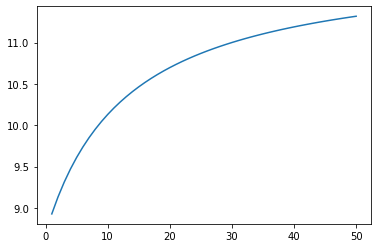

In [6]:
n_0 = np.linspace(1,50)
post_exp_B = (12*n_0+syB)/(n_0+nB)
plt.plot(n_0, post_exp_B)
plt.show()

-------
**c)** Should knowledge about population $A$ tell us anything about population $B$? Discuss whether or not it makes sense to have $p(θA,θB) = p(θA) × p(θB)$.

type B mice가 type A mice가 관련이 있다고 했으나, A와 비교했을 때 B에는 약한 prior가 주어졌다. 때문에 이 둘은 독립적이라고 볼 수 있다.